# Image Acquisition using Web Camera
# Ex.No: 01
# Image Acquisition


**Name:** Priyanka K              **Reg. No:** 212223230162

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

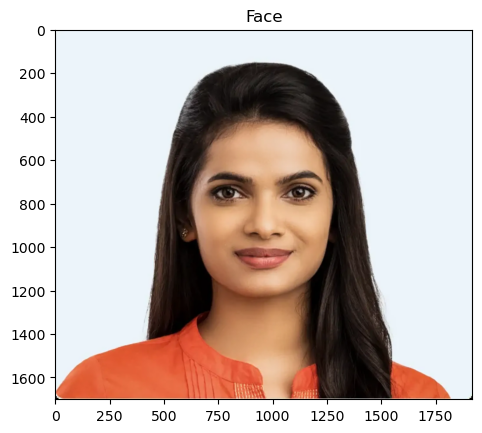

In [2]:
faceImage = cv2.imread('ws.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [3]:
faceImage.shape

(1701, 1920, 3)

Text(0.5, 1.0, 'glassPNG')

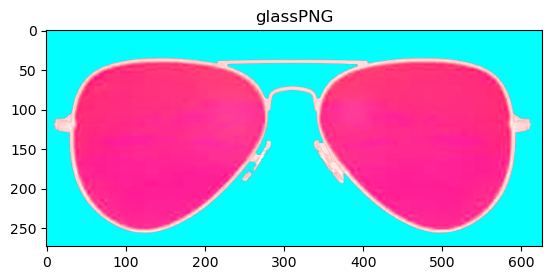

In [4]:
glassPNG = cv2.imread('sunglass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [5]:
glassPNG = cv2.resize(glassPNG,(700,200))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(200, 700, 4)


In [6]:
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

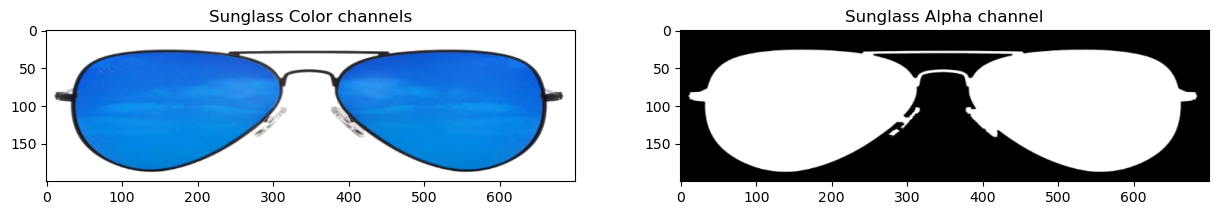

In [7]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

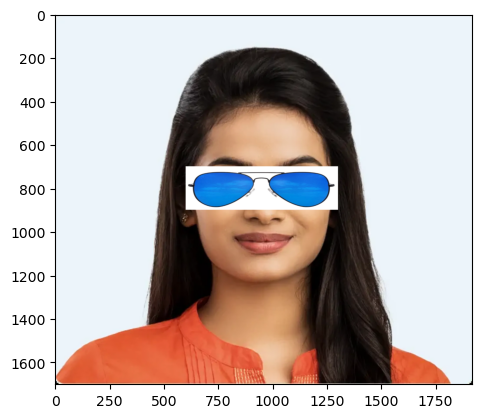

In [8]:
faceWithGlassesNaive = faceImage.copy()


faceWithGlassesNaive[700:900, 600:1300]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

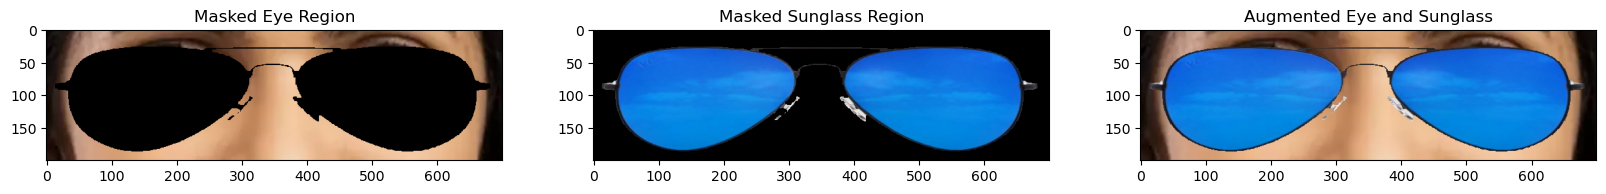

In [9]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

glassMask = np.uint8(glassMask/255)

faceWithGlassesArithmetic = faceImage.copy()

eyeROI= faceWithGlassesArithmetic[700:900, 600:1300]

maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))

maskedGlass = cv2.multiply(glassBGR,glassMask)

eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

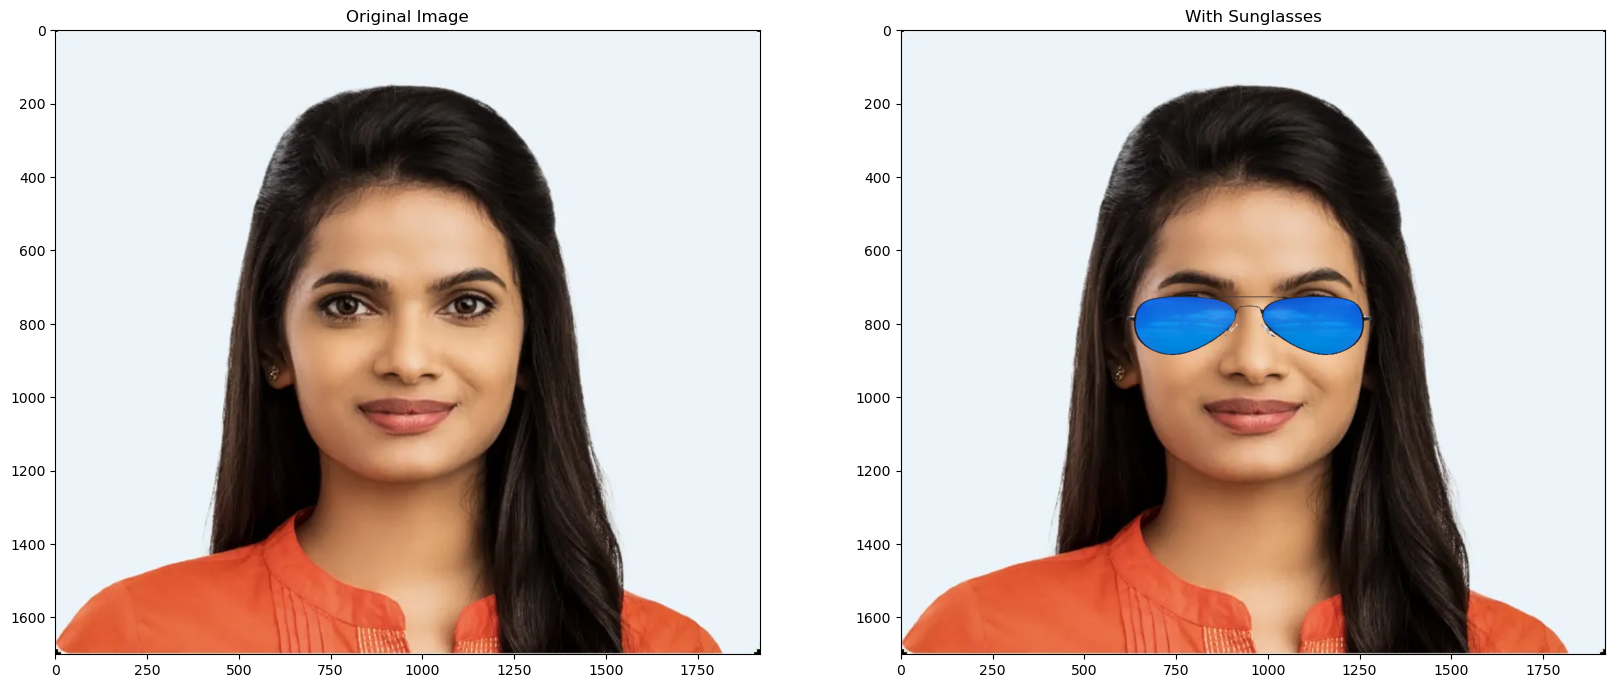

In [10]:
faceWithGlassesArithmetic[700:900, 600:1300]=eyeRoiFinal

plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");